<img src="https://www.katacoda.com/basiafusinska/courses/deep-learning-with-tensorflow/mnist-dataset/assets/MNIST.png" />

# MNIST Dataset

### Importing data and libraries

In [1]:
import os


In [2]:
os.listdir()

['.ipynb_checkpoints',
 'digit-recognizer.zip',
 'logs',
 'MNist dataset digit recognition.ipynb',
 'sample_submission.csv',
 'submission',
 'submission.csv',
 'test.csv',
 'train.csv']

In [3]:
import pandas as pd

In [4]:
traindatafile = pd.read_csv('train.csv')
testdatafile = pd.read_csv('test.csv')

In [5]:
traindatafile.head()


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
y = traindatafile.pop('label')

In [7]:
import numpy as np # linear algebra
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

### Data Wrangling

In [8]:
x_train, x_val, y_train, y_val = train_test_split(traindatafile, y, test_size=0.1, random_state=42)

In [9]:
traindatafile.shape

(42000, 784)

In [10]:
# Reshape image in 3 dimensions (height = 28px, width = 28px , canal = 1)
x_train = x_train.values.reshape(-1,28,28,1)
x_val = x_val.values.reshape(-1,28,28,1)
x_test= testdatafile.values.reshape(-1,28,28,1)

In [11]:
print(x_train.shape)
print(x_val.shape)

(37800, 28, 28, 1)
(4200, 28, 28, 1)


In [12]:
x_train[0]

array([[[  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0]],

       [[  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0]],

       [[  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
      

In [13]:
x_train = x_train.astype("float32")/255.
x_val = x_val.astype("float32")/255.
x_test = x_test.astype("float32")/255.

In [14]:
x_train[0]

array([[[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ]],

       [[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        

In [15]:
print(x_train.shape)
x_val.shape

(37800, 28, 28, 1)


(4200, 28, 28, 1)

In [16]:
x_test.shape

(28000, 28, 28, 1)

#### Importing Keras libraries

In [17]:
from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import LearningRateScheduler
from keras.callbacks import TensorBoard

Using TensorFlow backend.


In [18]:
y_train = to_categorical(y_train) 
y_val = to_categorical(y_val) 

In [19]:
print(y_train.shape)
y_val.shape

(37800, 10)


(4200, 10)

Train and test images (28px x 28px) has been stock into pandas.Dataframe as 1D vectors of 784 values. We reshape all data to 28x28x1 3D matrices.

Keras requires an extra dimension in the end which correspond to channels. MNIST images are gray scaled so it use only one channel. For RGB images, there is 3 channels, we would have reshaped 784px vectors to 28x28x3 3D matrices.

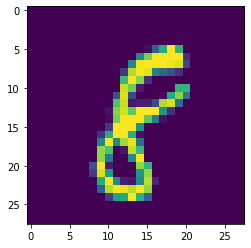

In [20]:
import matplotlib.pyplot as plt
%matplotlib inline 

g = plt.imshow(x_train[0][:,:,0])

### Model CNN 

<img src= "https://iq.opengenus.org/content/images/2018/11/cnn.png" />

In [21]:
# Set the CNN model 
# my CNN architechture is In -> [[Conv2D->relu]*2 -> MaxPool2D -> Dropout]*2 -> Flatten -> Dense -> Dropout -> Out

model = Sequential()

model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (28,28,1)))
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))


model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))


model.add(Flatten())
model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(10, activation = "softmax"))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [22]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 32)        832       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 32)        25632     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 14, 14, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 64)          0         
__________

this is to for changing images properties 

In [23]:
datagen = ImageDataGenerator(featurewise_center=False,  # set input mean to 0 over the dataset
                    samplewise_center=False,  # set each sample mean to 0
                                 featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
                               zca_whitening=False,  # apply ZCA whitening
        rotation_range=15, # randomly rotate images in the range (degrees, 0 to 180)
                              zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
                               height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=False,  # randomly flip images
                               vertical_flip=False)  # randomly flip images)

<img src="https://i.ytimg.com/vi/tRsSi_sqXjI/maxresdefault.jpg" />

In [24]:
model.compile(loss='categorical_crossentropy', optimizer = Adam(lr=1e-4), metrics=["accuracy"]) #1e-4, means the 1 is four digits the other way, so 1e-4 = 0.0001.

In [25]:
learning_rate_min = LearningRateScheduler(lambda x: 1e-3 * 0.9 ** x)
#tensor= TensorBoard(log_dir='./logs', histogram_freq=0, batch_size=32, write_graph=True, write_grads=False, write_images=False, embeddings_freq=0, embeddings_layer_names=None, embeddings_metadata=None, embeddings_data=None, update_freq=1000)

## Fitting the data in model

In [26]:
hist = model.fit_generator(datagen.flow(x_train, y_train, batch_size=16),
                           steps_per_epoch=500,
                           epochs=20, #Increase this when not on Kaggle kernel
                           verbose=2,  #1 for ETA, 0 for silent
                           validation_data=(x_val[:400,:], y_val[:400,:]), #For speed
                           callbacks=[learning_rate_min]) 

Instructions for updating:
Use tf.cast instead.
Epoch 1/20
 - 65s - loss: 0.7590 - acc: 0.7444 - val_loss: 0.1836 - val_acc: 0.9500
Epoch 2/20
 - 62s - loss: 0.2665 - acc: 0.9169 - val_loss: 0.1248 - val_acc: 0.9700
Epoch 3/20
 - 63s - loss: 0.2184 - acc: 0.9329 - val_loss: 0.0913 - val_acc: 0.9725
Epoch 4/20
 - 62s - loss: 0.1638 - acc: 0.9529 - val_loss: 0.0744 - val_acc: 0.9800
Epoch 5/20
 - 64s - loss: 0.1417 - acc: 0.9580 - val_loss: 0.0796 - val_acc: 0.9800
Epoch 6/20
 - 63s - loss: 0.1338 - acc: 0.9593 - val_loss: 0.0439 - val_acc: 0.9850
Epoch 7/20
 - 62s - loss: 0.1189 - acc: 0.9642 - val_loss: 0.0542 - val_acc: 0.9825
Epoch 8/20
 - 61s - loss: 0.1108 - acc: 0.9688 - val_loss: 0.0592 - val_acc: 0.9825
Epoch 9/20
 - 61s - loss: 0.0964 - acc: 0.9711 - val_loss: 0.0672 - val_acc: 0.9800
Epoch 10/20
 - 61s - loss: 0.0898 - acc: 0.9724 - val_loss: 0.0585 - val_acc: 0.9875
Epoch 11/20
 - 62s - loss: 0.0866 - acc: 0.9741 - val_loss: 0.0528 - val_acc: 0.9850
Epoch 12/20
 - 64s - loss:

In [27]:
final_loss, final_acc = model.evaluate(x_val, y_val, verbose=0)
print("Final loss: {0:.4f}, final accuracy: {1:.4f}".format(final_loss, final_acc))

Final loss: 0.0260, final accuracy: 0.9933


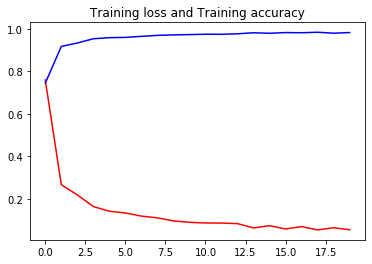

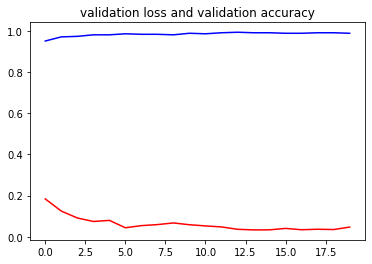

In [28]:
plt.plot(hist.history['loss'], color='r',label='Training loss')
plt.plot(hist.history['acc'], color='b',label='Training accuracy')
plt.title('Training loss and Training accuracy')
plt.show()

plt.plot(hist.history['val_loss'], color='r', label='Validation loss')
plt.plot(hist.history['val_acc'], color='b', label='Validation accuracy')
plt.title('validation loss and validation accuracy')
plt.show()

Confusion matrix example

<img src="https://s3-ap-south-1.amazonaws.com/av-blog-media/wp-content/uploads/2018/03/confusion-matrix-mercari.png" />

In [29]:
y_predicted = model.predict(x_val)
y_predictedint = np.argmax(y_predicted, axis=1)
y_true = np.argmax(y_val, axis=1)
cm = confusion_matrix(y_true, y_predictedint)
print(cm)

[[406   0   0   1   0   0   0   0   1   0]
 [  0 468   1   0   0   0   1   1   0   0]
 [  0   0 417   0   0   0   0   2   1   0]
 [  0   0   0 505   0   0   0   1   0   0]
 [  0   0   0   0 395   0   0   0   0   2]
 [  0   0   0   2   0 332   3   0   1   1]
 [  0   0   0   0   1   0 400   0   1   0]
 [  0   1   1   0   1   0   0 435   0   0]
 [  0   0   0   1   1   0   0   0 401   0]
 [  0   0   0   0   0   0   0   1   2 413]]


In [30]:
y_hat = model.predict(x_test ,batch_size=64)

In [31]:
print(y_hat)

[[7.6802192e-10 1.6062621e-08 9.9999881e-01 ... 1.0849004e-06
  1.3925833e-07 1.7414099e-09]
 [9.9999297e-01 3.9935464e-09 3.1212872e-07 ... 3.6996543e-08
  9.0512481e-07 2.5653435e-06]
 [1.1478090e-08 1.8889155e-08 2.4995026e-07 ... 2.1674273e-06
  1.3506071e-05 9.9983561e-01]
 ...
 [5.0970483e-16 1.6818578e-12 2.2511937e-11 ... 1.3938091e-12
  1.0100496e-09 1.5393267e-11]
 [7.8980941e-07 5.1275788e-09 1.6801489e-07 ... 1.7784945e-05
  5.9595999e-07 9.9994695e-01]
 [7.3402775e-13 8.2003127e-10 9.9999988e-01 ... 3.9693511e-08
  1.7435241e-07 9.4851080e-12]]


In [32]:
y_pred = np.argmax(y_hat,axis=1)

In [33]:
y_pred

array([2, 0, 9, ..., 3, 9, 2], dtype=int64)

In [34]:
print(y_pred)

[2 0 9 ... 3 9 2]


In [35]:
y_pred.shape

(28000,)

#####  another way to submit 
with open("submission.csv", 'w') as f :
    f.write('ImageId,Label\n')
    for i in range(len(y_pred)) :
        f.write("".join([str(i+1),',',str(y_pred[i]),'\n']))

In [36]:
submissions=pd.DataFrame({"ImageId": list(range(1,len(y_pred)+1)),
                         "Label": y_pred})
submissions.to_csv("submission.csv", index=False, header=True)
